# Happy Customers Project

## Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

## Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers <br/>
X1 = my order was delivered on time <br/>
X2 = contents of my order was as I expected <br/>
X3 = I ordered everything I wanted to order <br/>
X4 = I paid a good price for my order <br/>
X5 = I am satisfied with my courier <br/>
X6 = the app makes ordering easy for me <br/>

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

## Summary of the Project:

### Process:
Our Analysis was conducted following these steps:

1) Import Libraries and Load Data
2) Data preprocessing
3) EDA and Visualization of each feature to understand our features and dataset
4) Create a base model using LazyPredict library to test multiple models
5) Select the model with the best accuracy to move forward
6) Feature Selection
7) Train Final model
8) SHAP analysis on our final model

### Insights:
* In the data we saw no missing or null values. The range of values for each feature was correct. The dataset was quite balanced.

* The 'delivered on time' and 'app makes ordering easy' are the most advantages services of the company with high rating (>3) and the company should focus on them to continue to do well and also,
try to improve all the other features we saw in the survey in order to get better with outmost focus the 'contents as expected' which was the lowest rated (<3) feature of the survey.

### Conclusion:
* The best performed model was RandomForest with 62% accuracy at first and 81% accuracy as our final model after hyperpatameter tuning and feature selection.

### Import Libraries

In [1]:
# random
import random

# cell output clear tool
from IPython.display import clear_output

# data
import pandas as pd
import numpy as np

# visualisations
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
#from pandas_profiling import ProfileReport

# basic models
from lazypredict.Supervised import LazyClassifier

# shap
import shap

# sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.inspection import permutation_importance

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid

### Load Data and Exploratory Data Analysis (EDA)

In [2]:
# load dataset
data = pd.read_csv("Data/ACME-HappinessSurvey2020.csv")
data.head()

# perform EDA on the whole dataset to understand the data 
#profile = ProfileReport(data)
#profile.to_widgets()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
# drop duplicater rows
#print(sum(data.duplicated()))
#data.drop_duplicates(keep='first', ignore_index=True)

16

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# Change colnames to their meaning in the survey
data.rename(columns={'X1':'delivered_on_time', 
                     'X2':'contents_as_expected',
                     'X3':'ordered_everything_I_wanted',
                     'X4':'paid_a_good_price',
                     'X5':'satisfied_with_my_courier',
                     'X6':'app_makes_ordering_easy',
                     'Y':'Happy'},inplace=True)

# Get statistics about the data
data.describe()

,Happy,delivered_on_time,contents_as_expected,ordered_everything_I_wanted,paid_a_good_price,satisfied_with_my_courier,app_makes_ordering_easy
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


* As we can see all the feature and within the correct values: 1-5 for the features and 0-1 for the target variable Happy.
* There are no null or missing variables in the data as the count is 126 in all variables.
* Through the 'mean' field we see that 'delivered on time' and 'app makes ordering easy' are the most advantages services of the company with high rating (>3) 
  and ,also, 'contents as expected' is the disadvantage of the company with low rating (<3).

### Visualization of data and each feature

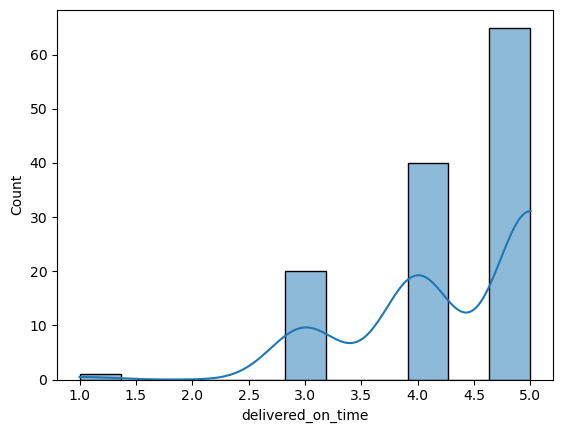

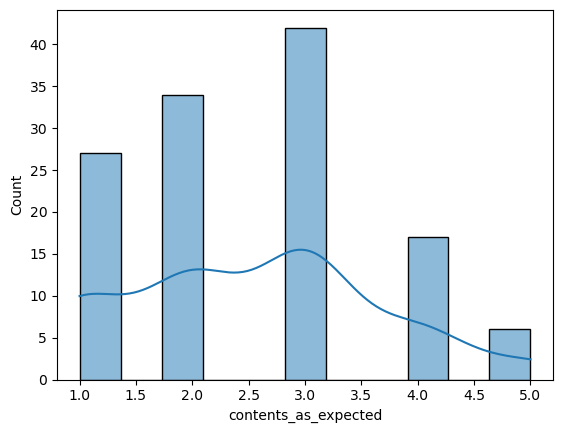

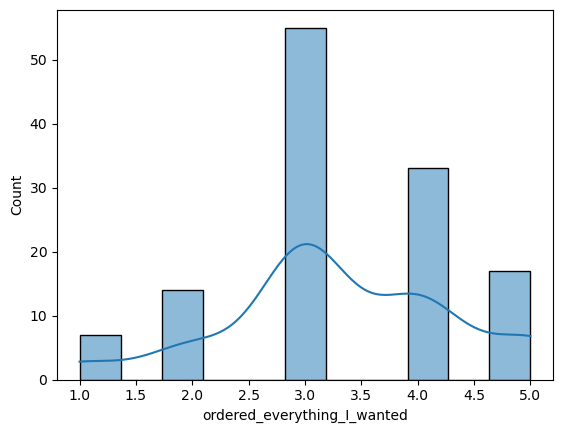

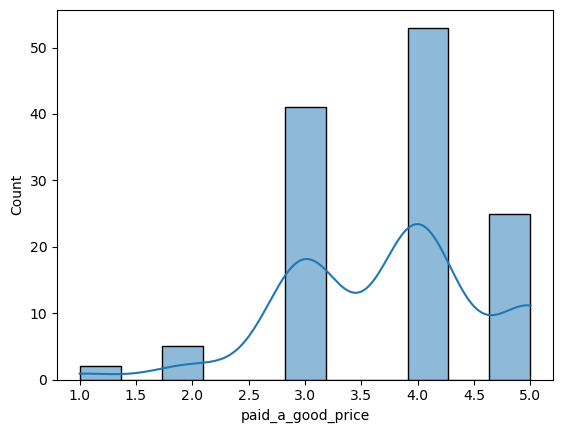

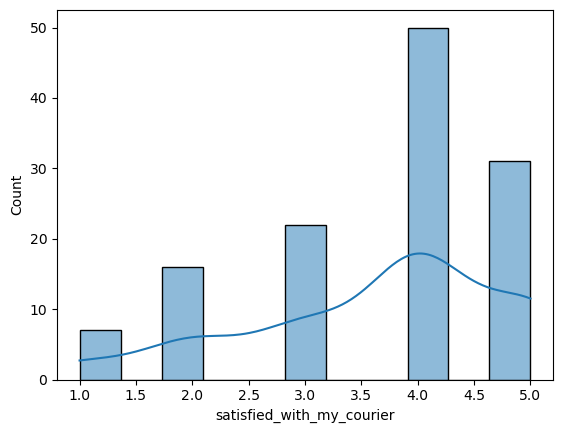

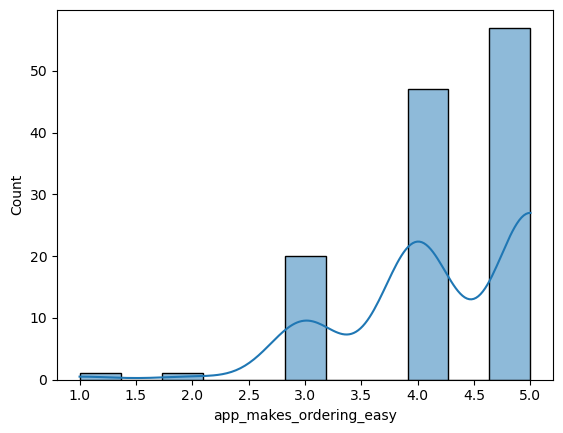

In [5]:
# distributions
for col in data.columns[1:]:
  plt.figure()
  sns.histplot(data=data, x=col, kde=True)

In [6]:
df_percentage = pd.DataFrame(data['Happy'].value_counts())
df_percentage['Percentage (%)'] = (df_percentage['Happy']/df_percentage['Happy'].sum())*100
df_percentage

,Happy,Percentage (%)
1,69,54.76
0,57,45.24


Text(0.5, 1.0, 'Correlation Heatmap')

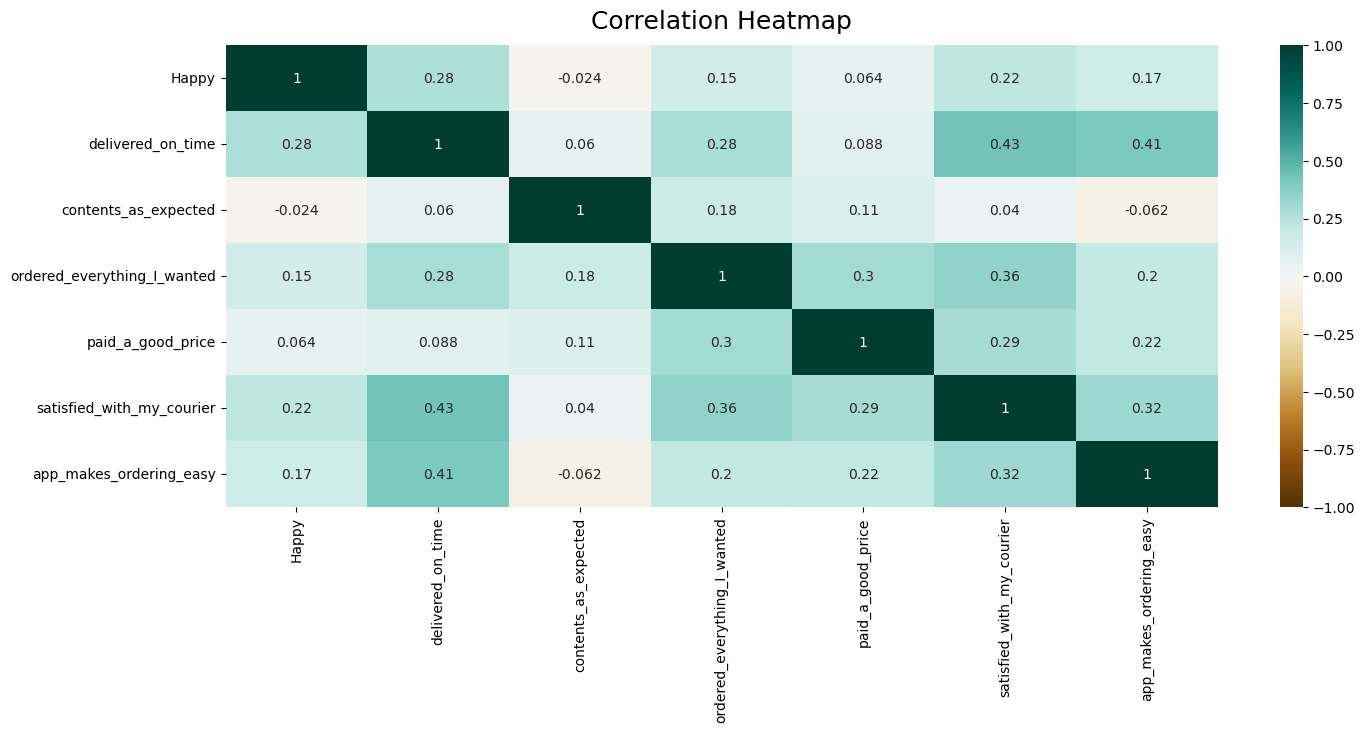

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

* As we see from the heatmap features 'contents as expected' and 'paid a good price' has negative or low correlation with Y, we could exclude them for the model but we will decide that after the base model with the feature importance analysis
* We see that the dataset is quite balanced and there is no bias towards one class (Happy or Unhappy).

### Base Model

Try different random states with the lazyclassifier through many classifiers.
Create a dictionary to store the best model and its random state.

In [10]:
np.random.seed(1)
X=data.drop('Happy', axis=1) # select the features of our dataset
Y=data['Happy'] # select the target Y

# split the data into training and test data sets
# use different random states
p = pd.DataFrame(columns=['Random_State','Model','Accuracy'])
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, # features to split
                                                        Y, # response to split
                                                        test_size=0.2, # we will leave 20% to test our models on later. 
                                                        random_state=i, # make our work reproducible
                                                        stratify = Y)  # same amount of ppl who are/are not happy in the training and test set

    basic_clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    models,predictions = basic_clf.fit(X_train, X_test, y_train, y_test)
    best_models = models.sort_values(by=['Accuracy'], ascending=False).index.tolist()
    acc = models.sort_values(by=['Accuracy'], ascending=False)['Accuracy'].iloc[0]
    p = p.append({'Random_State': i, 'Model' : best_models[0], 'Accuracy' : acc}, ignore_index=True)

# Clear notebook output after training
clear_output(wait=True)

p.sort_values(by=['Accuracy'], ascending=False)[:10]

,Random_State,Model,Accuracy
98,98,BaggingClassifier,0.92
58,58,NearestCentroid,0.81
89,89,BernoulliNB,0.81
27,27,BernoulliNB,0.77
5,5,ExtraTreeClassifier,0.77
6,6,PassiveAggressiveClassifier,0.77
56,56,PassiveAggressiveClassifier,0.77
74,74,NearestCentroid,0.77
97,97,ExtraTreeClassifier,0.77
39,39,LGBMClassifier,0.77


Take best models and test them on the test set.

In [25]:
def top_models(model):
  if model == 'PassiveAggressiveClassifier':
     cl = PassiveAggressiveClassifier(random_state=6)
  elif model == 'BaggingClassifier':
     cl = BaggingClassifier(random_state=98) 
  elif model == 'RandomForestClassifier':
     cl = RandomForestClassifier(random_state=6)
  elif model == 'NearestCentroid':
     random.seed(58)
     cl = NearestCentroid()
  elif model == 'BernoulliNB':
     random.seed(89)
     cl = BernoulliNB()
  elif model == 'ExtraTreesClassifier':
     cl = ExtraTreesClassifier(random_state=5)

 
  cl.fit(X_train,y_train)
  acc = cl.score(X_test,y_test)
  return 'Accuracy of ' + model + ': ' + str(acc)

In [26]:
models = ['PassiveAggressiveClassifier',
          'RandomForestClassifier',
          'NearestCentroid',
          'BernoulliNB',
          'ExtraTreesClassifier',
          'BaggingClassifier']

for model in models:
  print(top_models(model))

Accuracy of PassiveAggressiveClassifier: 0.46153846153846156
Accuracy of RandomForestClassifier: 0.6153846153846154
Accuracy of NearestCentroid: 0.5
Accuracy of BernoulliNB: 0.5384615384615384
Accuracy of ExtraTreesClassifier: 0.5384615384615384
Accuracy of BaggingClassifier: 0.46153846153846156


We will continue with RandomForestClassifier as it was the model with the best accuracy.

In [27]:
# split the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, # features to split
                                                    Y, # response to split
                                                    test_size=0.2, # we will leave 10% to test our models on later. We have a small dataset so we need as many data to train on as possible.
                                                    random_state=6, # make our work reproducible
                                                    stratify = Y)  # same amount of ppl who are/are not happy in the training and test set


rf_hyperparams = {"n_estimators": [10,15,20,25,30,35,40,45,50,70,80,90,100,500], # number of trees used in random forest
                 "max_depth": [2,3,4,5,6], # max depth
                 "criterion": ["gini", "entropy"], # to check whether impurity or information gain is the best way to split
                 "min_samples_leaf": [2,3,4,5,6,7,8,9,10], # minimum samples beyond which a node cannot be split
                 "max_features": ["sqrt", "log2"], # to check what is the best way to limit the number of features to each tree
                 "bootstrap": [True,False] # to check whether bagging and aggregating results in a better model 
                 } 

rf_cl = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rf_cl,    # estimator
                    param_distributions=rf_hyperparams, # parameters to try
                    refit = "bal_acc_score", # Refit an estimator using the best found parameters on the whole dataset.
                    n_iter=50,
                    random_state=6)  # make our work reproducible

# fit the training data
model_rf = rscv.fit(X_train, y_train)
print(model_rf.best_params_)

{'n_estimators': 30, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 2, 'criterion': 'gini', 'bootstrap': False}


In [28]:
# train the model using the best estimator
rf_best = model_rf.best_estimator_
model = rf_best.fit(X_train, y_train)

# predictions
y_pred_rf = model.predict(X_test)

# classification report
clf_report = classification_report(y_test, y_pred_rf)

print(f"Classification Report : \n{clf_report}")

print(f'Accuracy: {round(accuracy_score(y_test, y_pred_rf),2)*100}%') # correct predictions / total predictions

Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.42      0.50        12
           1       0.61      0.79      0.69        14

    accuracy                           0.62        26
   macro avg       0.62      0.60      0.59        26
weighted avg       0.62      0.62      0.60        26

Accuracy: 62.0%


### Feature Selection

Feature importances with the help of SHAP values

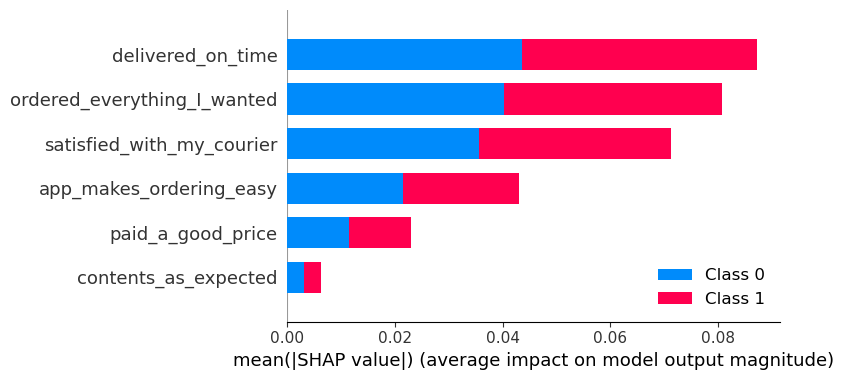

In [29]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

We will select 'delivered on time' , 'satisfied with my courier' and 'ordered everything I wanted' as our features for the final model, because as we see they are the feature that impact the output of our model the most. Also, this analysis explains the heatmap in the beginning.

### Final Model

In [31]:
# drop the features we dont want
final_X = X.copy().drop(['app_makes_ordering_easy', 'paid_a_good_price', 'contents_as_expected'], axis=1)
final_X.head()

,delivered_on_time,ordered_everything_I_wanted,satisfied_with_my_courier
0,3,3,2
1,3,3,4
2,5,3,3
3,5,3,3
4,5,3,3


In [32]:
# test the model under digfferent random states
p = pd.DataFrame(columns=['Random_State','Accuracy'])

for i in range(100):

    X2 = final_X.copy()
    y2 = Y.copy()

    # split the data into training and test data sets
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, # data-features to split
                                                        y2, # data-response to split
                                                        test_size=0.2, # we will leave 10% to test our models on later
                                                        random_state=i, # make our work reproducible
                                                        stratify=y2)

    # Randomized Search Cross Validation
    rf2 = RandomForestClassifier()
    rscv2 = RandomizedSearchCV(estimator=rf2,    # estimator
                        param_distributions=rf_hyperparams, # parameters to try
                        refit = "bal_acc_score", # Refit an estimator using the best found parameters on the whole dataset
                        n_iter=20,
                        n_jobs=-1,
                        random_state=i)  # make our work reproducible

    # fit the training data
    model_rf2 = rscv2.fit(X_train2, y_train2)
    print(model_rf2.best_params_)

    # train the model using the best estimator
    rf2 = model_rf2.best_estimator_
    model2 = rf2.fit(X_train2, y_train2)

    # predictions
    y_pred_rf2 = model2.predict(X_test2)

    acc = round(accuracy_score(y_test2, y_pred_rf2),2)*100
    p = p.append({'Random_State': i, 'Accuracy' : acc}, ignore_index=True)

# Clear notebook output after training
clear_output(wait=True)

p.sort_values(by=['Accuracy'], ascending=False)[:5]

,Random_State,Accuracy
32,32.00,77.00
31,31.00,77.00
85,85.00,77.00
56,56.00,77.00
73,73.00,77.00


In [33]:
X2 = final_X.copy()
y2 = Y.copy()

# split the data into training and test data sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, # data-features to split
                                                        y2, # data-response to split
                                                        test_size=0.2, # we will leave 10% to test our models on later
                                                        random_state=32, # make our work reproducible
                                                        stratify=y2)

# Randomized Search Cross Validation
rf2 = RandomForestClassifier()
rscv2 = RandomizedSearchCV(estimator=rf2,    # estimator
                        param_distributions=rf_hyperparams, # parameters to try
                        refit = "bal_acc_score", # Refit an estimator using the best found parameters on the whole dataset
                        n_iter=20,
                        n_jobs=-1,
                        random_state=32)  # make our work reproducible

# fit the training data
model_rf2 = rscv2.fit(X_train2, y_train2)
print(model_rf2.best_params_)

# train the model using the best estimator
rf2 = model_rf2.best_estimator_
model2 = rf2.fit(X_train2, y_train2)

# predictions
y_pred_rf2 = model2.predict(X_test2)

# classification report
clf_report2 = classification_report(y_test2, y_pred_rf2)

print(f"Classification Report : \n{clf_report2}")

print(f'Accuracy: {round(accuracy_score(y_test2, y_pred_rf2),2)*100}%') # correct predictions / total predictions

{'n_estimators': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.64      0.78        14

    accuracy                           0.81        26
   macro avg       0.85      0.82      0.81        26
weighted avg       0.86      0.81      0.80        26

Accuracy: 81.0%


### SHAP Analysis to better explain our ML model

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, # features to split
                                                    Y, # response to split
                                                    test_size=0.2, # we will leave 20% to test our models on later. 
                                                    random_state=32, # make our work reproducible
                                                    stratify = Y)  # same amount of ppl who are/are not happy in the training and test set

rf = DecisionTreeClassifier()
rf.fit(X_train,y_train)
explainer = shap.TreeExplainer(rf)

shap_values = explainer.shap_values(X_test)

Summary Plots

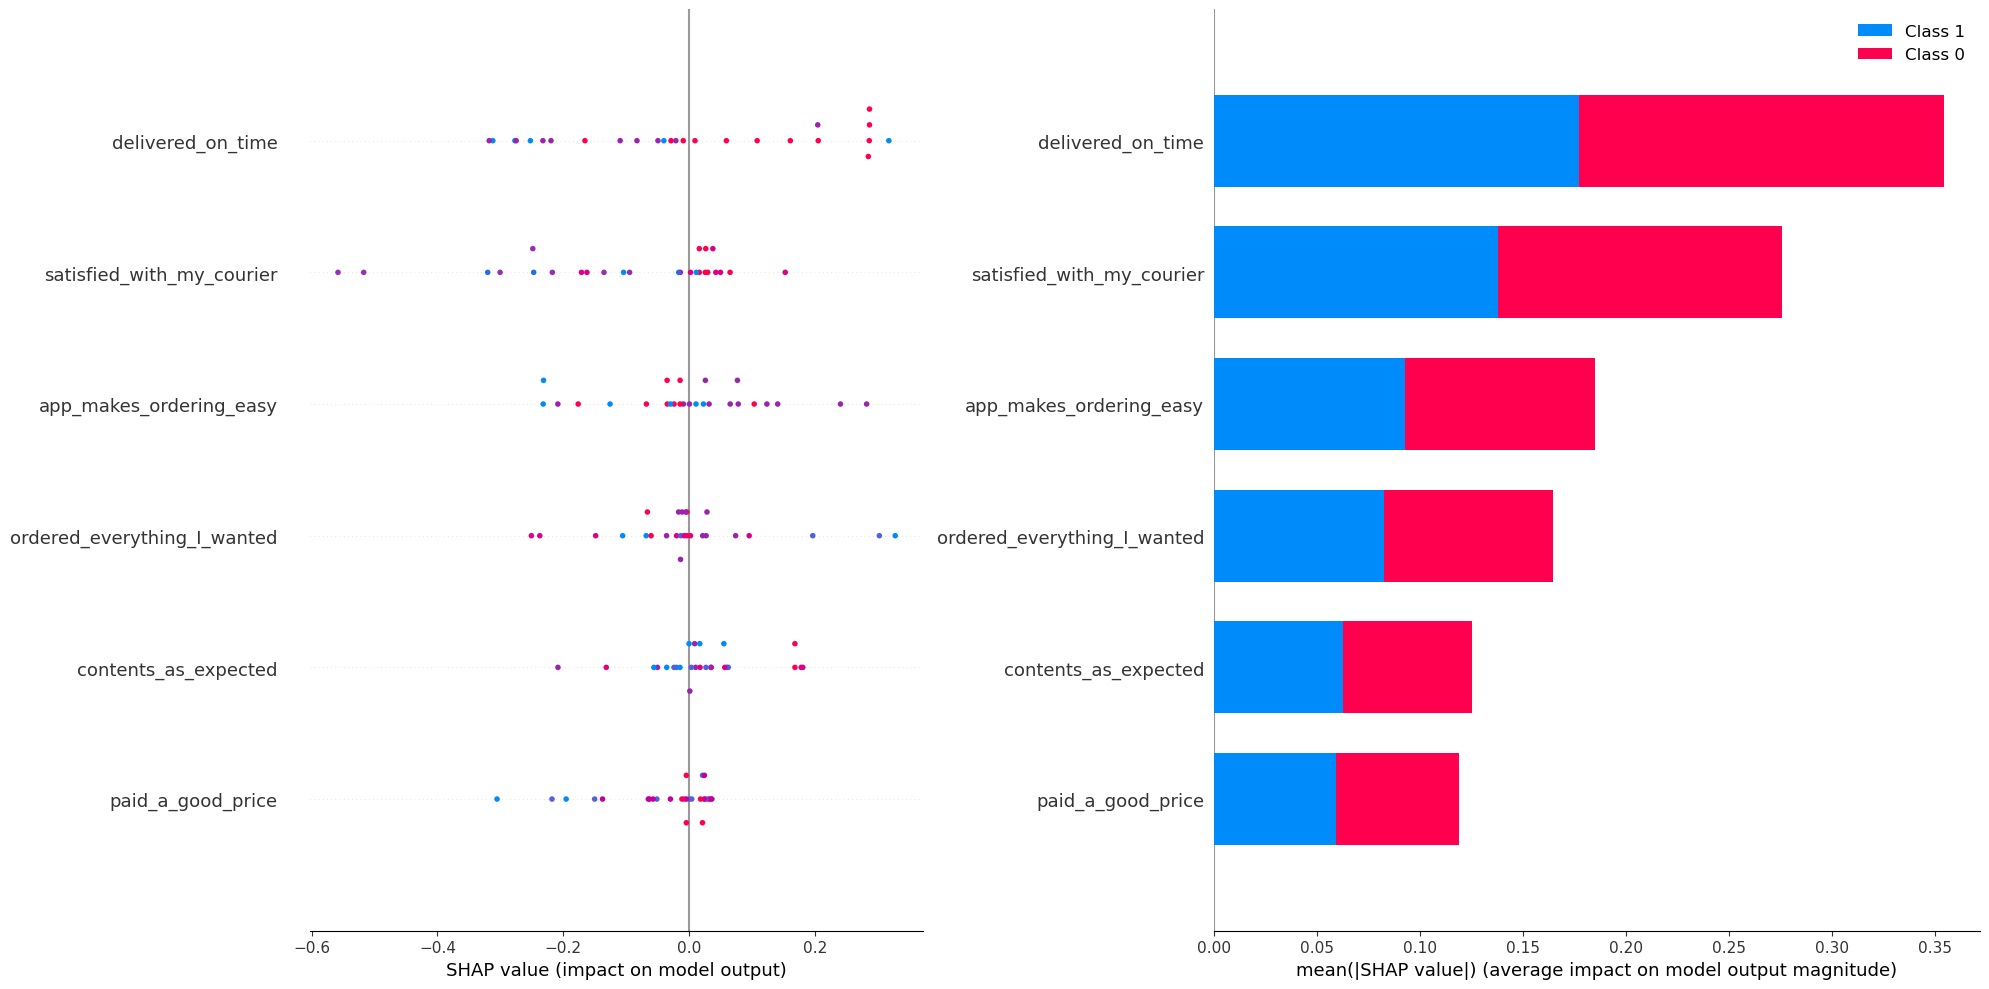

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
shap.summary_plot(shap_values[1], X_test, plot_size=None,show=False)
plt.subplot(1,2,2)
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=None,show=False)
plt.tight_layout()
plt.show()

#### Force Plots

Force plots are suitable for row-wise SHAP analysis. It takes in a single row and shows in a rank order how each of the features contributed to the prediction. Wider a feature’s block, more the contribution.

- Red: Features that push the prediction to the base line.
- Blue: Features that pull the prediction lower from the base line.
- Red arrows represent feature effects (SHAP values) that drive the prediction value higher while blue arrows are those effects that drive the prediction value lower.

In [47]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
k = 2 # controls which row to examine
print(f'The label for row {k} in the test set is: {y_test.iloc[k]}')
shap.force_plot(explainer.expected_value[1], shap_values[1][k], X_test.iloc[k])

The label for row 2 in the test set is: 1


#### Dependence Plots

The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at SHAP dependence plots.

Dependence plots can be of great use while analyzing feature importance and doing feature selection. It makes one-versus-one plot against two features by plotting shap values of one feature and coloring the dots with respect to another interactive feature.

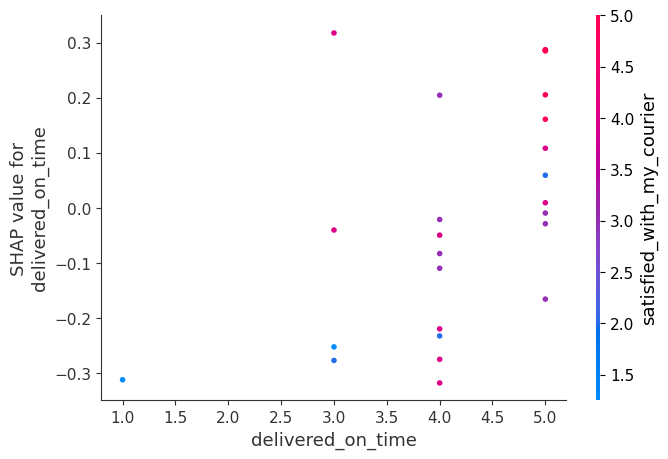

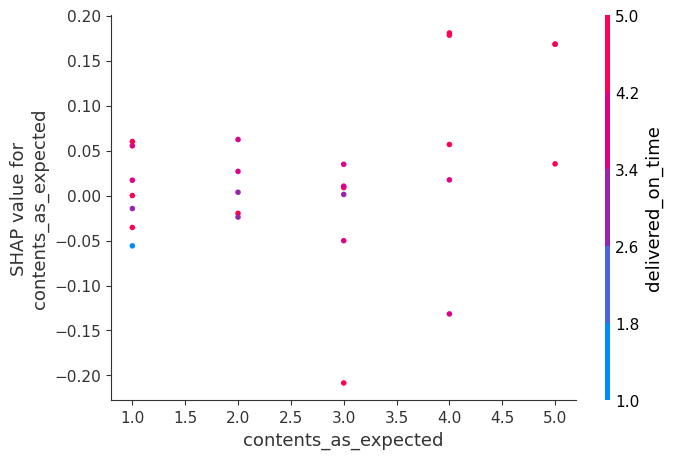

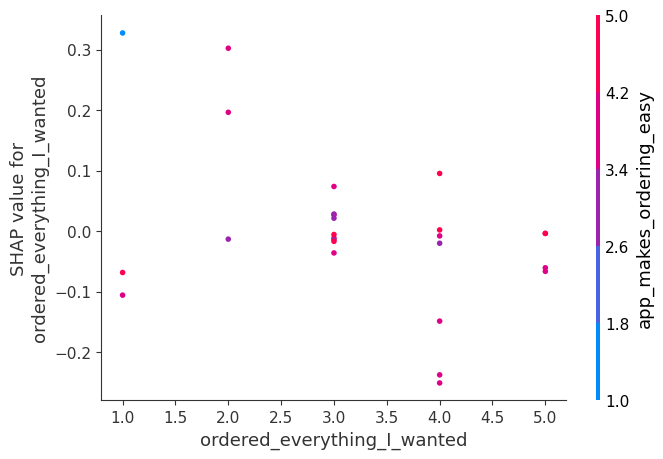

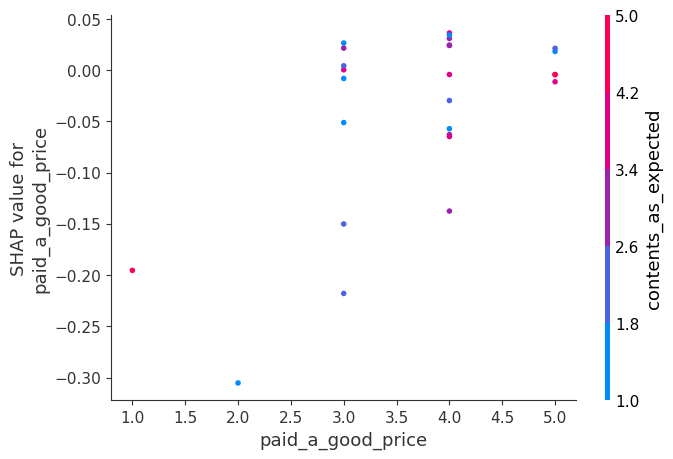

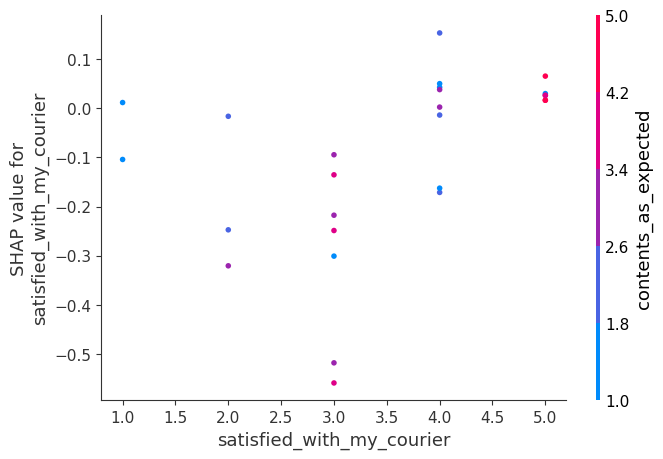

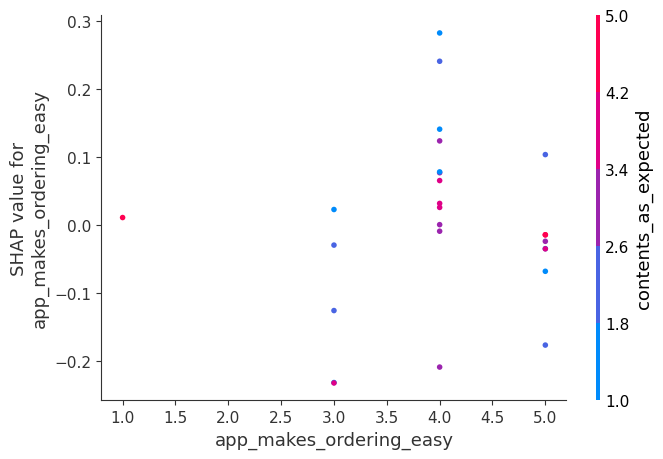

In [48]:
for i in range(6):
    shap.dependence_plot(i, shap_values[1], X_test)

#### Decision Plot

As the summary plot, it gives an overall picture of contribution to prediction. From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values.

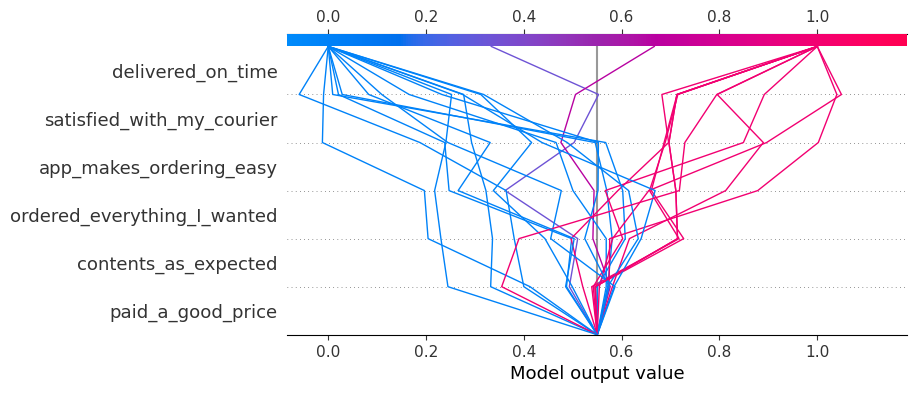

In [49]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test)